In [2]:
import pandas as pd

In [13]:
df_bagerhat = pd.read_csv('Bagerhat_historical_weather_1980_2024.csv')

# for Heat Index 
here we are taking temperature and humidity so that data doesn't leak while training models

In [14]:
df_bagerhat.info()
df_bagerhat.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16437 entries, 0 to 16436
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   district                       16437 non-null  object 
 1   day                            16437 non-null  int64  
 2   month                          16437 non-null  int64  
 3   year                           16437 non-null  int64  
 4   temperature(degree C)          10478 non-null  float64
 5   feels_like(degree C)           10478 non-null  float64
 6   max_temperature(degree C)      14991 non-null  float64
 7   minimum_temperature(degree C)  14991 non-null  float64
 8   humidity                       10478 non-null  float64
 9   precipitation                  5479 non-null   float64
 10  windspeed                      11924 non-null  float64
 11  atmospheric_pressure           7115 non-null   float64
 12  UV                             4038 non-null  

,district,day,month,year,temperature(degree C),feels_like(degree C),max_temperature(degree C),minimum_temperature(degree C),humidity,precipitation,windspeed,atmospheric_pressure,UV,solar_radiation,dew_point
0,Bagerhat,1,1,1980,21.7,21.7,26.1,18.1,77.1,NaN,3.6,1013.0,NaN,NaN,17.1
1,Bagerhat,2,1,1980,20.8,20.8,25.1,15.1,64.4,NaN,5.4,1012.9,NaN,NaN,13.3
2,Bagerhat,3,1,1980,23.0,23.0,26.1,16.6,60.2,NaN,16.6,1013.0,NaN,NaN,14.1
3,Bagerhat,4,1,1980,22.3,22.3,26.1,16.1,70.4,NaN,18.4,1014.2,NaN,NaN,16.3
4,Bagerhat,5,1,1980,22.1,22.1,26.1,18.1,67.8,NaN,11.2,1015.1,NaN,NaN,15.5


In [5]:
# find the number of temperature and humidity in the dataset
df_bagerhat_temperature= df_bagerhat['temperature(degree C)'].count()
print (f"temperature(degree C) has : {df_bagerhat_temperature}")

df_bagerhat_humidity= df_bagerhat['humidity'].count()
print (f"humidity has : {df_bagerhat_humidity}")

temperature(degree C) has : 10478
humidity has : 10478


# Features for HI

In [15]:
desired_colmn = ['day', 'month', 'year', 'temperature(degree C)', 'humidity']
HI_df_bagerhat = df_bagerhat[desired_colmn]

HI_df_bagerhat.head()

,day,month,year,temperature(degree C),humidity
0,1,1,1980,21.7,77.1
1,2,1,1980,20.8,64.4
2,3,1,1980,23.0,60.2
3,4,1,1980,22.3,70.4
4,5,1,1980,22.1,67.8


In [16]:
with_no_null_HI = HI_df_bagerhat.dropna()
print(f"After removing missing values from bagerhat, dataset contains {with_no_null_HI.shape[0]} rows and {with_no_null_HI.shape[1]} columns out of {df_bagerhat.shape[0]} rows.")
with_no_null_HI.head()

After removing missing values from bagerhat, dataset contains 10478 rows and 5 columns out of 16437 rows.


,day,month,year,temperature(degree C),humidity
0,1,1,1980,21.7,77.1
1,2,1,1980,20.8,64.4
2,3,1,1980,23.0,60.2
3,4,1,1980,22.3,70.4
4,5,1,1980,22.1,67.8


In [17]:

# count zeros per column and show as a table
zeros_per_col = (with_no_null_HI == 0).sum()
zeros_df = zeros_per_col.to_frame(name='zero_count')
zeros_df['zero_percentage'] = (zeros_df['zero_count'] / len(with_no_null_HI) * 100).round(2)
zeros_df = zeros_df[zeros_df['zero_count'] > 0].sort_values('zero_count', ascending=False)

print("Number of zeros per column (only columns with >0 zeros shown):")
display(zeros_df)

# drop rows that contain any 0 or 0.0 and update with_no_null_HI
rows_before = with_no_null_HI.shape[0]
with_no_null_HI = with_no_null_HI[(with_no_null_HI != 0).all(axis=1)]
rows_after = with_no_null_HI.shape[0]
print(f"Dropped {rows_before - rows_after} rows containing zero values. New shape: {with_no_null_HI.shape}")

Number of zeros per column (only columns with >0 zeros shown):


,zero_count,zero_percentage


Dropped 0 rows containing zero values. New shape: (10478, 5)


Date range: 1980-01-01 to 2024-12-31


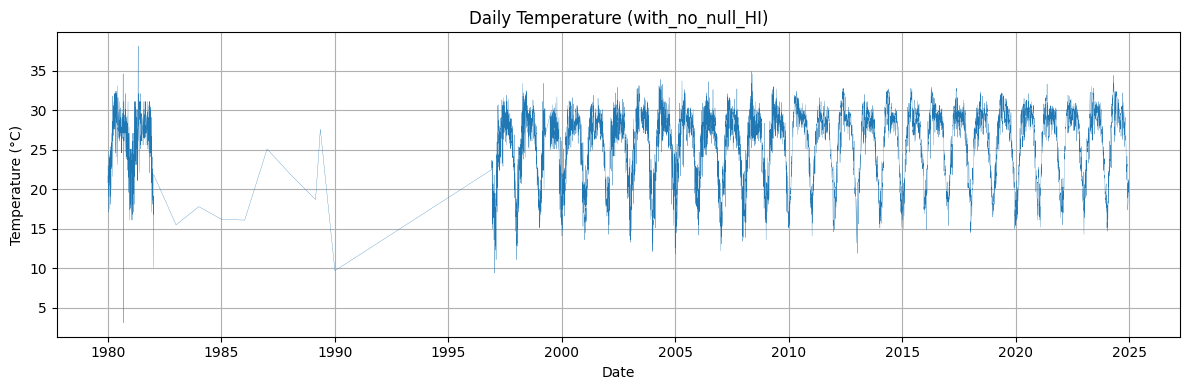

C:\Users\Khalid\AppData\Local\Temp\ipykernel_11208\1663535528.py:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = with_no_null_HI.set_index('date')['temperature(degree C)'].resample('M').mean()


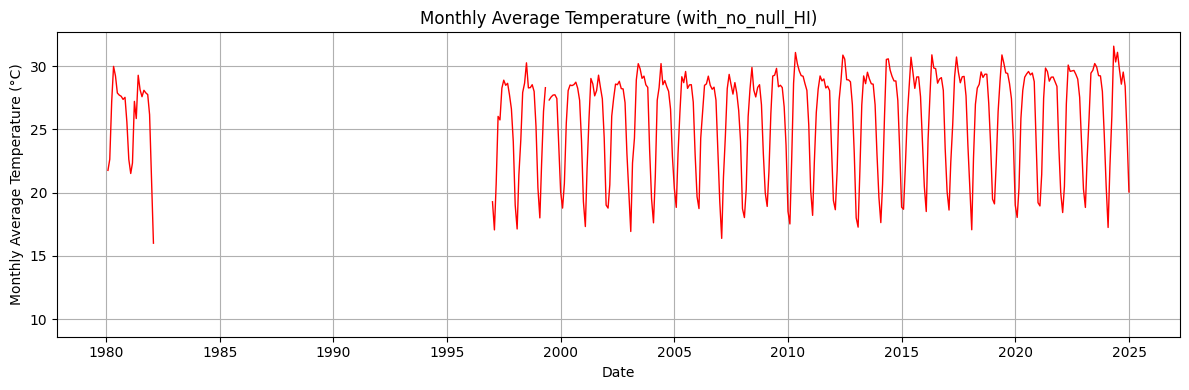

In [28]:
import matplotlib.pyplot as plt

# ensure a datetime column exists
if 'date' not in with_no_null_HI.columns:
    with_no_null_HI['date'] = pd.to_datetime(with_no_null_HI[['year', 'month', 'day']])

# show date range
min_date = with_no_null_HI['date'].min()
max_date = with_no_null_HI['date'].max()
print(f"Date range: {min_date.date()} to {max_date.date()}")

# plot daily temperature time series
plt.figure(figsize=(12, 4))
plt.plot(with_no_null_HI['date'], with_no_null_HI['temperature(degree C)'], linewidth=0.2)
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Daily Temperature (with_no_null_HI)')
plt.grid(True)
plt.tight_layout()
plt.show()

# plot monthly average temperature to show trend
monthly_avg = with_no_null_HI.set_index('date')['temperature(degree C)'].resample('M').mean()
plt.figure(figsize=(12, 4))
plt.plot(monthly_avg.index, monthly_avg.values, color='red', linewidth=1)
plt.xlabel('Date')
plt.ylabel('Monthly Average Temperature (°C)')
plt.title('Monthly Average Temperature (with_no_null_HI)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [31]:
temp_col = 'temperature(degree C)'
hum_col = 'humidity'

def calculate_heat_index(temperature_c, humidity):    
    t_c = float(temperature_c)
    h = float(humidity)

    # If humidity is a fraction (0..1), convert to percent
    if 0.0 <= h <= 1.0:
        h = h * 100.0

    # Convert °C -> °F: $F = \\frac{9}{5}C + 32$
    t_f = t_c * 9.0/5.0 + 32.0

    # Simple approximation:
    hi = 0.5 * (t_f + 61.0 + ((t_f - 68.0) * 1.2) + (h * 0.094))
    # Full NWS formula if applicable:
    if hi >= 80.0:
        T = t_f; R = h
        hi = (-42.379 + 2.04901523 * T + 10.14333127 * R
              - 0.22475541 * T * R - 6.83783e-3 * T**2
              - 5.481717e-2 * R**2 + 1.22874e-3 * T**2 * R
              + 8.5282e-4 * T * R**2 - 1.99e-6 * T**2 * R**2)

    # Convert back to °C: $C = \\frac{5}{9}(F - 32)$
    hi_c = (hi - 32.0) * 5.0/9.0
    return hi_c

with_no_null_HI['heat_index_C'] = with_no_null_HI.apply(
    lambda r: calculate_heat_index(r[temp_col], r[hum_col]), axis=1)
# ...existing code...
with_no_null_HI['heat_index_C'].info()
with_no_null_HI.head()

<class 'pandas.core.series.Series'>
Index: 10478 entries, 0 to 16436
Series name: heat_index_C
Non-Null Count  Dtype  
--------------  -----  
10478 non-null  float64
dtypes: float64(1)
memory usage: 163.7 KB


,day,month,year,temperature(degree C),humidity,date,heat_index_C
0,1,1,1980,21.7,77.1,1980-01-01,21.938722
1,2,1,1980,20.8,64.4,1980-01-02,20.617111
2,3,1,1980,23.0,60.2,1980-01-03,22.927444
3,4,1,1980,22.3,70.4,1980-01-04,22.423778
4,5,1,1980,22.1,67.8,1980-01-05,22.135889


# Random Forest for HI

In [33]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Expect a DataFrame named `with_no_nullData`
df = with_no_null_HI.copy()

Features = [temp_col, hum_col]

TARGET = "heat_index_C"
DROP_COLS = ["date"]  # drop datetime; you already have day/month/year

# Build X, y
X = df[Features]
y = df[TARGET].astype(float)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Metrics
r2  = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

def within_tolerance_acc(y_true, y_hat, tol):
    return float((np.abs(y_true - y_hat) <= tol).mean())

acc_05 = within_tolerance_acc(y_test.values, y_pred, 0.5)
acc_10 = within_tolerance_acc(y_test.values, y_pred, 1.0)
acc_20 = within_tolerance_acc(y_test.values, y_pred, 2.0)
acc_30 = within_tolerance_acc(y_test.values, y_pred, 3.0)

print("==== RandomForest Regression Metrics (Test) ====")
print(f"R^2  : {r2:.4f}")
print(f"MSE  : {mse:.4f}")
print(f"RMSE : {rmse:.4f}")
print("Accuracy (|error| ≤ tolerance):")
print(f"  ±0.5°C : {acc_05*100:.2f}%")
print(f"  ±1.0°C : {acc_10*100:.2f}%")
print(f"  ±2.0°C : {acc_20*100:.2f}%")
print(f"  ±3.0°C : {acc_30*100:.2f}%")

# 5-fold CV R^2
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_r2 = cross_val_score(rf, X, y, cv=cv, scoring="r2", n_jobs=-1)
print("\n==== 5-Fold CV R^2 ====")
print(f"Mean R^2 : {cv_r2.mean():.4f}  |  Std : {cv_r2.std():.4f}")

# Feature importances
fi = pd.DataFrame({
    "feature": X.columns,
    "importance": rf.feature_importances_
}).sort_values("importance", ascending=False)

print("\n==== Top 20 Feature Importances ====")
print(fi.head(20).to_string(index=False))

==== RandomForest Regression Metrics (Test) ====
R^2  : 0.9993
MSE  : 0.0423
RMSE : 0.2056
Accuracy (|error| ≤ tolerance):
  ±0.5°C : 99.43%
  ±1.0°C : 99.81%
  ±2.0°C : 99.95%
  ±3.0°C : 99.95%

==== 5-Fold CV R^2 ====
Mean R^2 : 0.9996  |  Std : 0.0003

==== Top 20 Feature Importances ====
              feature  importance
temperature(degree C)    0.982569
             humidity    0.017431


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10478 entries, 0 to 16436
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   day                    10478 non-null  int64         
 1   month                  10478 non-null  int64         
 2   year                   10478 non-null  int64         
 3   temperature(degree C)  10478 non-null  float64       
 4   humidity               10478 non-null  float64       
 5   date                   10478 non-null  datetime64[ns]
 6   heat_index_C           10478 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(3)
memory usage: 654.9 KB


# predicting next 15 days HI

In [38]:
import pandas as pd
import numpy as np

# --- Inputs ---
df = with_no_null_HI.copy()  # your original DataFrame
TARGET = "heat_index_C"

# Sort by date
df = df.sort_values("date").reset_index(drop=True)

# 1) Create next 15 dates
last_date = df["date"].max()
future_dates = pd.date_range(last_date + pd.Timedelta(days=1), periods=365, freq="D")
future_df = pd.DataFrame({"date": future_dates})
future_df["year"] = future_df["date"].dt.year
future_df["month"] = future_df["date"].dt.month
future_df["day"] = future_df["date"].dt.day

# 2) Build monthly-day climatology from historical data
hist = df.copy()
hist["month"] = hist["date"].dt.month
hist["day"] = hist["date"].dt.day

clim = (
    hist.groupby(["month", "day"])[[temp_col, hum_col]]
    .mean()
    .reset_index()
    .rename(columns={temp_col: f"{temp_col}_clim", hum_col: f"{hum_col}_clim"})
)

# Merge climatology into future calendar
future_with_clim = future_df.merge(clim, on=["month", "day"], how="left")

# 3) Fallback for missing climatology values: use recent rolling mean (last 7 days)
recent_window = 7
recent_mean_temp = (
    hist[temp_col].tail(recent_window).mean() if not hist.empty else np.nan
)
recent_mean_hum = (
    hist[hum_col].tail(recent_window).mean() if not hist.empty else np.nan
)

# Fill missing climatology with recent means
future_with_clim[temp_col] = future_with_clim[f"{temp_col}_clim"].fillna(recent_mean_temp)
future_with_clim[hum_col]  = future_with_clim[f"{hum_col}_clim"].fillna(recent_mean_hum)

# Keep only the feature columns expected by the model
X_future = future_with_clim[[temp_col, hum_col]].copy()

# 4) Predict using your trained RF model
future_pred = rf.predict(X_future)

# 5) Output DataFrame
forecast_out = future_with_clim[["date", "year", "month", "day"]].copy()
forecast_out["pred_heat_index_C"] = future_pred
forecast_out[temp_col] = X_future[temp_col].values
forecast_out[hum_col]  = X_future[hum_col].values

print("==== 15-step Forecast (naive climatology baseline) ====")
print(forecast_out)

==== 15-step Forecast (naive climatology baseline) ====
          date  year  month  day  pred_heat_index_C  temperature(degree C)  \
0   2025-01-01  2025      1    1          18.088435              18.087500   
1   2025-01-02  2025      1    2          18.312251              18.325806   
2   2025-01-03  2025      1    3          18.189958              18.157576   
3   2025-01-04  2025      1    4          17.847444              17.906452   
4   2025-01-05  2025      1    5          17.464338              17.492857   
..         ...   ...    ...  ...                ...                    ...   
360 2025-12-27  2025     12   27          18.195092              18.175862   
361 2025-12-28  2025     12   28          18.065937              18.063333   
362 2025-12-29  2025     12   29          18.141356              18.234483   
363 2025-12-30  2025     12   30          17.948302              17.964516   
364 2025-12-31  2025     12   31          18.607556              18.630000   

      h

# new feature created : feels_like_max_temperature(degree C)

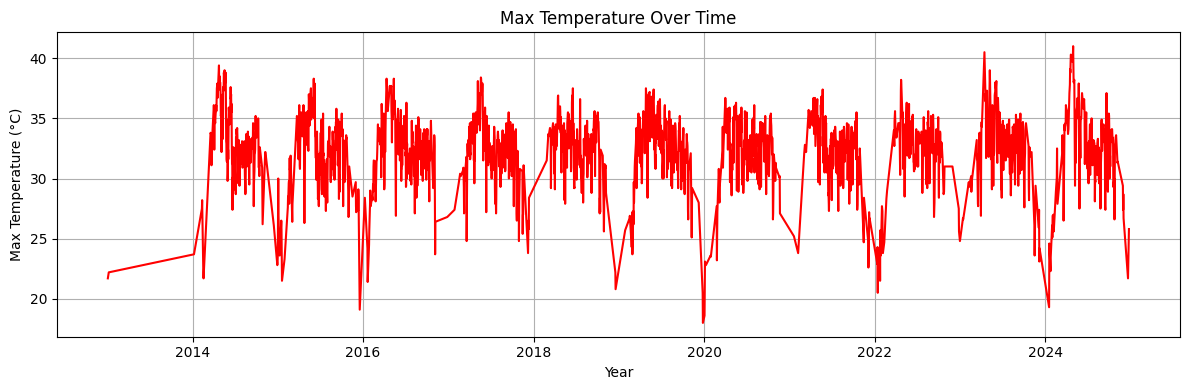

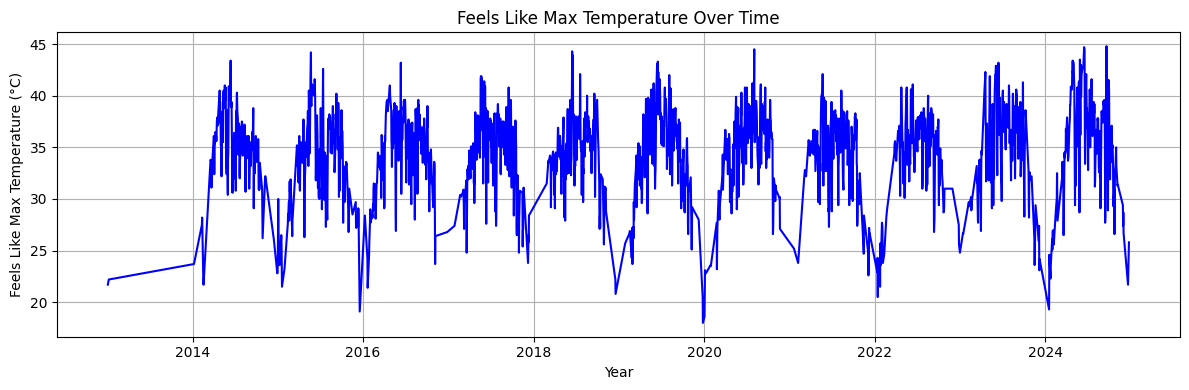

In [ ]:
# Plot max_temperature over time
plt.figure(figsize=(12, 4))
plt.plot(with_no_null['date'], with_no_null['max_temperature(degree C)'], color='red')
plt.xlabel('Year')
plt.ylabel('Max Temperature (°C)')
plt.title('Max Temperature Over Time')
plt.grid(True)
plt.tight_layout()
plt.show()

# Ensure the 'feels_like_max_temperature(degree C)' feature exists.
# If it doesn't, create it as the maximum of 'feels_like(degree C)' and 'max_temperature(degree C)'.
if 'feels_like_max_temperature(degree C)' not in with_no_null.columns:
	with_no_null['feels_like_max_temperature(degree C)'] = with_no_null[['feels_like(degree C)', 'max_temperature(degree C)']].max(axis=1)

# Plot feels_like_max_temperature over time
plt.figure(figsize=(12, 4))
plt.plot(with_no_null['date'], with_no_null['feels_like_max_temperature(degree C)'], color='blue')
plt.xlabel('Year')
plt.ylabel('Feels Like Max Temperature (°C)')
plt.title('Feels Like Max Temperature Over Time')
plt.grid(True)
plt.tight_layout()
plt.show()


# daily precipiataion time series

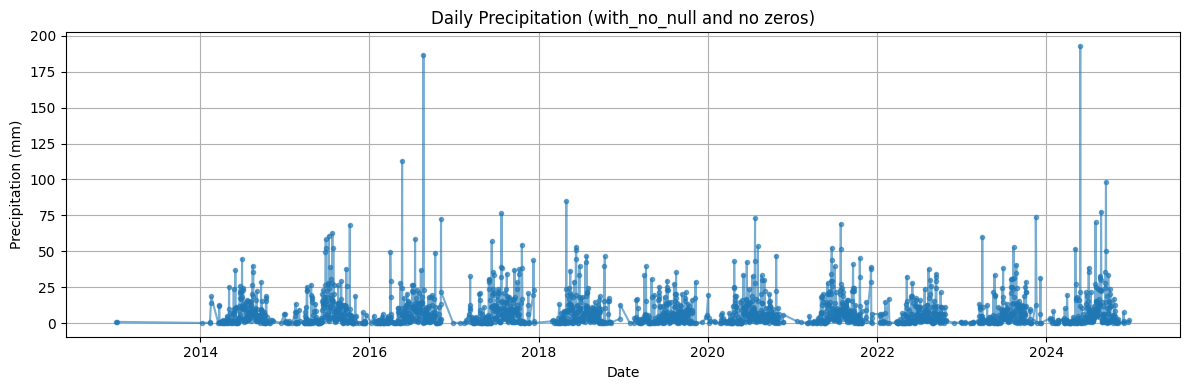

C:\Users\MTBD\AppData\Local\Temp\ipykernel_15860\1034543916.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_precip = with_no_null.set_index('date')['precipitation'].resample('M').sum()


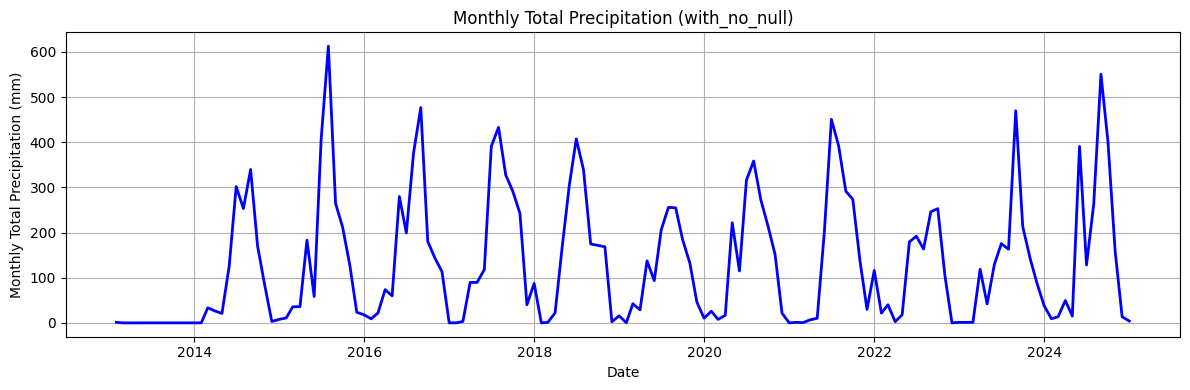

In [ ]:
# Daily precipitation time series
plt.figure(figsize=(12, 4))
plt.plot(with_no_null['date'], with_no_null['precipitation'], marker='.', linestyle='-', alpha=0.6)
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.title('Daily Precipitation (with_no_null and no zeros)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Monthly total precipitation (sum) to show trend
monthly_precip = with_no_null.set_index('date')['precipitation'].resample('M').sum()
plt.figure(figsize=(12, 4))
plt.plot(monthly_precip.index, monthly_precip.values, color='blue', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Monthly Total Precipitation (mm)')
plt.title('Monthly Total Precipitation (with_no_null)')
plt.grid(True)
plt.tight_layout()
plt.show()

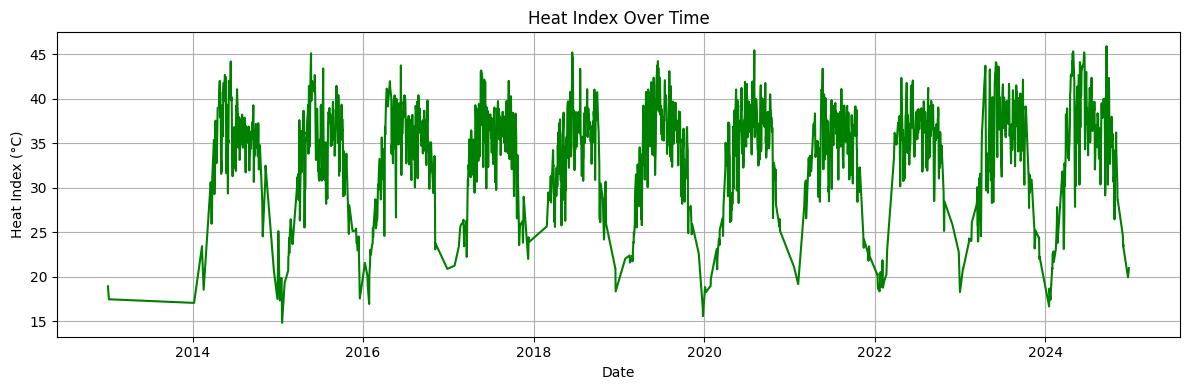

<class 'pandas.core.frame.DataFrame'>
Index: 2378 entries, 12056 to 16430
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   district                              2378 non-null   object        
 1   day                                   2378 non-null   int64         
 2   month                                 2378 non-null   int64         
 3   year                                  2378 non-null   int64         
 4   temperature(degree C)                 2378 non-null   float64       
 5   feels_like(degree C)                  2378 non-null   float64       
 6   max_temperature(degree C)             2378 non-null   float64       
 7   minimum_temperature(degree C)         2378 non-null   float64       
 8   humidity                              2378 non-null   float64       
 9   precipitation                         2378 non-null   float64       
 10  

In [ ]:
# plot the heat index time series
plt.figure(figsize=(12, 4))
plt.plot(with_no_null['date'], with_no_null['heat_index_C'], color='green')
plt.xlabel('Date')
plt.ylabel('Heat Index (°C)')
plt.title('Heat Index Over Time')
plt.grid(True)
plt.tight_layout()
plt.show()
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
with_no_null.info()


In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Expect a DataFrame named `with_no_nullData`
df = with_no_null.copy()

Features = [temp_col, hum_col]

TARGET = "heat_index_C"
DROP_COLS = ["date"]  # drop datetime; you already have day/month/year

# Build X, y
X = df[Features]
y = df[TARGET].astype(float)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Metrics
r2  = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

def within_tolerance_acc(y_true, y_hat, tol):
    return float((np.abs(y_true - y_hat) <= tol).mean())

acc_05 = within_tolerance_acc(y_test.values, y_pred, 0.5)
acc_10 = within_tolerance_acc(y_test.values, y_pred, 1.0)
acc_20 = within_tolerance_acc(y_test.values, y_pred, 2.0)
acc_30 = within_tolerance_acc(y_test.values, y_pred, 3.0)

print("==== RandomForest Regression Metrics (Test) ====")
print(f"R^2  : {r2:.4f}")
print(f"MSE  : {mse:.4f}")
print(f"RMSE : {rmse:.4f}")
print("Accuracy (|error| ≤ tolerance):")
print(f"  ±0.5°C : {acc_05*100:.2f}%")
print(f"  ±1.0°C : {acc_10*100:.2f}%")
print(f"  ±2.0°C : {acc_20*100:.2f}%")
print(f"  ±3.0°C : {acc_30*100:.2f}%")

# 5-fold CV R^2
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_r2 = cross_val_score(rf, X, y, cv=cv, scoring="r2", n_jobs=-1)
print("\n==== 5-Fold CV R^2 ====")
print(f"Mean R^2 : {cv_r2.mean():.4f}  |  Std : {cv_r2.std():.4f}")

# Feature importances
fi = pd.DataFrame({
    "feature": X.columns,
    "importance": rf.feature_importances_
}).sort_values("importance", ascending=False)

print("\n==== Top 20 Feature Importances ====")
print(fi.head(20).to_string(index=False))

ModuleNotFoundError: No module named 'sklearn'

# when 

Features = [temp_col, hum_col, 'feels_like_max_temperature(degree C)', 'max_temperature(degree C)', 'precipitation']
```
==== RandomForest Regression Metrics (Test) ====
R^2  : 0.9982
MSE  : 0.0542
RMSE : 0.2328
Accuracy (|error| ≤ tolerance):
  ±0.5°C : 95.59%
  ±1.0°C : 99.58%
  ±2.0°C : 100.00%
  ±3.0°C : 100.00%

==== 5-Fold CV R^2 ====
Mean R^2 : 0.9972  |  Std : 0.0008

==== Top 20 Feature Importances ====
                             feature  importance
               temperature(degree C)    0.796788
feels_like_max_temperature(degree C)    0.189944
                            humidity    0.011250
           max_temperature(degree C)    0.001533
                       precipitation    0.000485
```

# when 
Features = [temp_col, hum_col, 'precipitation']
```
==== RandomForest Regression Metrics (Test) ====
R^2  : 0.9979
MSE  : 0.0654
RMSE : 0.2557
Accuracy (|error| ≤ tolerance):
  ±0.5°C : 96.01%
  ±1.0°C : 98.74%
  ±2.0°C : 99.58%
  ±3.0°C : 100.00%

==== 5-Fold CV R^2 ====
Mean R^2 : 0.9987  |  Std : 0.0005

==== Top 20 Feature Importances ====
              feature  importance
temperature(degree C)    0.970971
             humidity    0.028524
        precipitation    0.000506
        ```

# when 
Features = [temp_col, hum_col]
```
==== RandomForest Regression Metrics (Test) ====
R^2  : 0.9984
MSE  : 0.0477
RMSE : 0.2183
Accuracy (|error| ≤ tolerance):
  ±0.5°C : 96.64%
  ±1.0°C : 98.95%
  ±2.0°C : 99.58%
  ±3.0°C : 100.00%

==== 5-Fold CV R^2 ====
Mean R^2 : 0.9990  |  Std : 0.0004

==== Top 20 Feature Importances ====
              feature  importance
temperature(degree C)    0.971307
             humidity    0.028693